In [1]:
pip install opencv-python matplotlib scikit-image

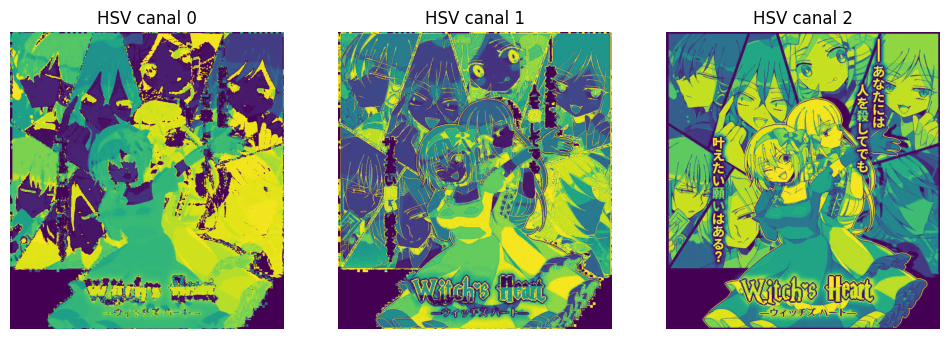

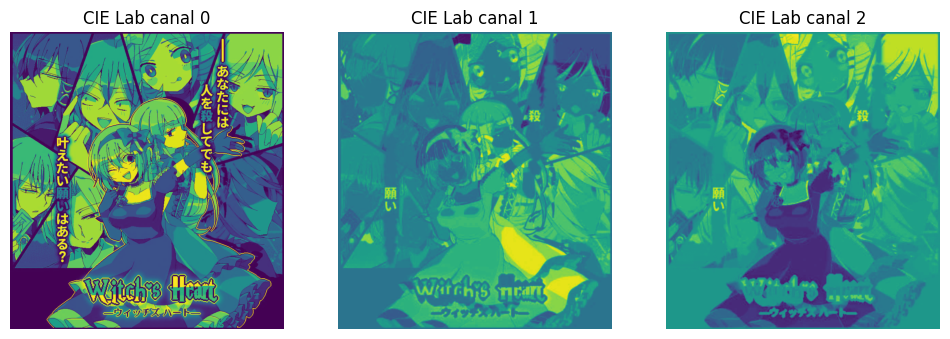

In [2]:
import cv2
import matplotlib.pyplot as plt
from skimage import color
import numpy as np

# Cargar imagen (usa tu propia imagen o una de ejemplo)
img = cv2.imread('Witchs heart.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Conversión a HSV y CIE Lab
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2Lab)

# Mostrar canales individuales
def mostrar_canales(titulo, img, cmap='viridis'):
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    canales = cv2.split(img)
    for i in range(3):
        axs[i].imshow(canales[i], cmap=cmap)
        axs[i].set_title(f'{titulo} canal {i}')
        axs[i].axis('off')
    plt.show()

mostrar_canales('HSV', img_hsv)
mostrar_canales('CIE Lab', img_lab)


=== Método 1: Matrices Modificadas ===


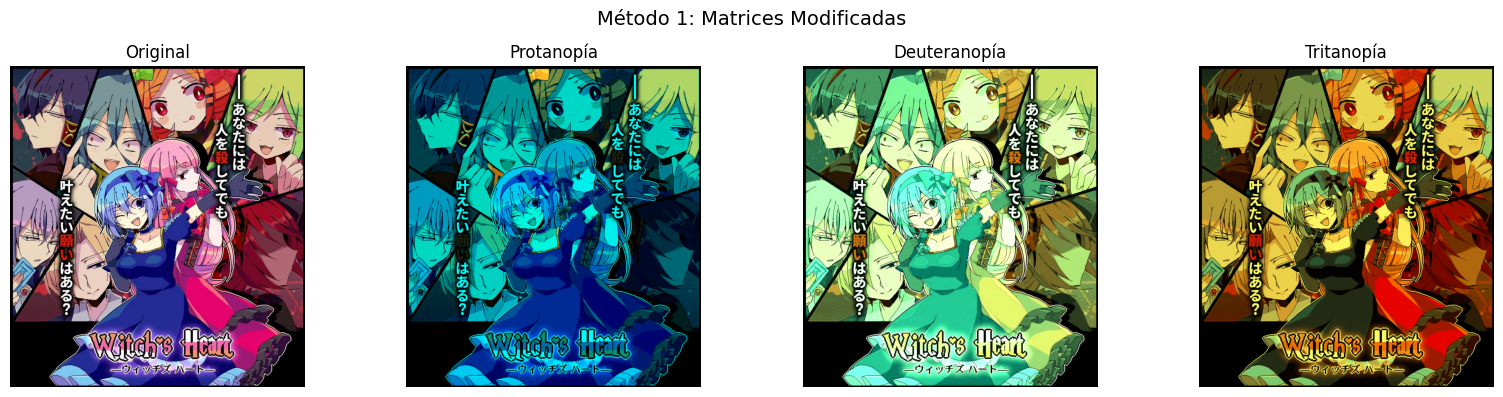


=== Método 2: Manipulación Directa de Canales (Recomendado) ===


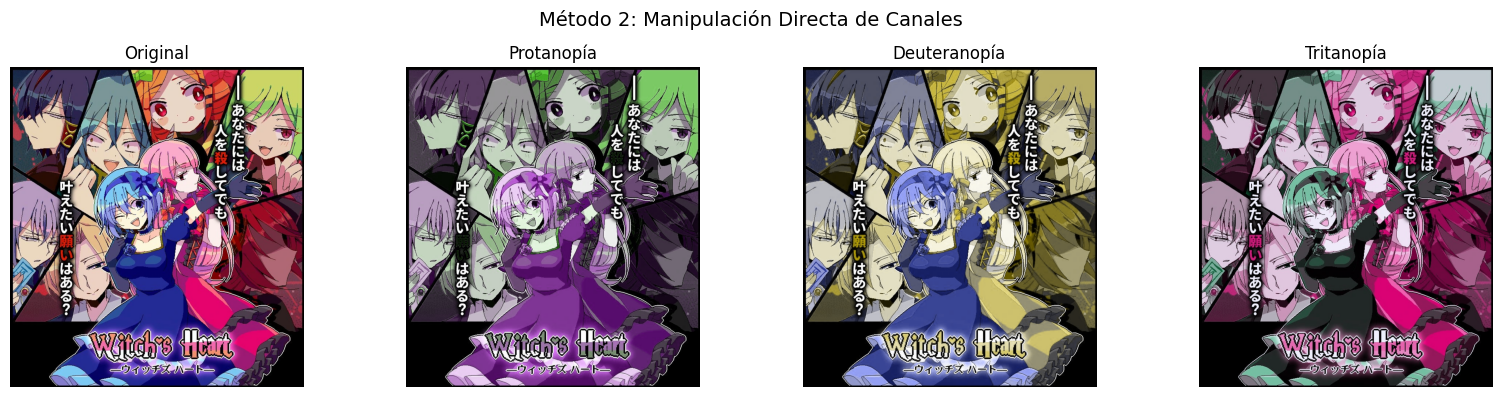

In [9]:
def simular_daltonismo(img_rgb, tipo='protanopia'):
    """
    Simula diferentes tipos de daltonismo con matrices diferenciadas
    para hacer más evidentes las diferencias entre protanopía y deuteranopía
    """

    # Matrices de transformación con diferencias más marcadas
    transformaciones = {
        'protanopia': np.array([
            [0.0, 2.02344, -2.52581],    # Elimina completamente el canal rojo
            [0.0, 1.0, 0.0],             # Preserva verde
            [0.0, 0.0, 1.0]              # Preserva azul
        ]),
        'deuteranopia': np.array([
            [1.0, 0.0, 0.0],             # Preserva rojo
            [0.494207, 0.0, 1.24827],    # Modifica verde basándose en rojo y azul
            [0.0, 0.0, 1.0]              # Preserva azul
        ]),
        'tritanopia': np.array([
            [1.0, 0.0, 0.0],             # Preserva rojo
            [0.0, 1.0, 0.0],             # Preserva verde
            [-0.395913, 0.801109, 0.0]   # Modifica azul basándose en rojo y verde
        ])
    }

    if tipo not in transformaciones:
        raise ValueError(f"Tipo '{tipo}' no válido. Use: {list(transformaciones.keys())}")

    matrix = transformaciones[tipo]

    # Convertir imagen a formato flotante
    img_float = img_rgb.astype(np.float32) / 255.0

    # Aplicar transformación lineal
    shape_original = img_float.shape
    img_flat = img_float.reshape(-1, 3)

    # Multiplicar por la matriz de transformación
    img_transformada = np.dot(img_flat, matrix.T)

    # Asegurar que los valores estén en el rango [0,1]
    img_transformada = np.clip(img_transformada, 0, 1)

    # Restaurar forma original y convertir de vuelta a uint8
    img_resultado = img_transformada.reshape(shape_original)
    return (img_resultado * 255).astype(np.uint8)

def simular_daltonismo_alternativo(img_rgb, tipo='protanopia'):
    """
    Método alternativo que simula daltonismo manipulando directamente los canales de color
    para crear diferencias más evidentes entre protanopía y deuteranopía
    """
    img_float = img_rgb.astype(np.float32) / 255.0
    img_resultado = img_float.copy()

    if tipo == 'protanopia':
        # Protanopía: problemas con el rojo
        # Reemplazar el rojo con una combinación de verde y azul
        img_resultado[:,:,0] = 0.2 * img_float[:,:,1] + 0.8 * img_float[:,:,2]
        # Ajustar verde para compensar
        img_resultado[:,:,1] = 0.9 * img_float[:,:,1] + 0.1 * img_float[:,:,2]

    elif tipo == 'deuteranopia':
        # Deuteranopía: problemas con el verde
        # Reemplazar el verde con una combinación de rojo y azul
        img_resultado[:,:,1] = 0.7 * img_float[:,:,0] + 0.3 * img_float[:,:,2]
        # Ajustar rojo para compensar
        img_resultado[:,:,0] = 0.8 * img_float[:,:,0] + 0.2 * img_float[:,:,2]

    elif tipo == 'tritanopia':
        # Tritanopía: problemas con el azul
        # Reemplazar el azul con una combinación de rojo y verde
        img_resultado[:,:,2] = 0.5 * img_float[:,:,0] + 0.5 * img_float[:,:,1]
        # Ajustar otros canales ligeramente
        img_resultado[:,:,0] = 0.95 * img_float[:,:,0]
        img_resultado[:,:,1] = 0.95 * img_float[:,:,1]

    # Asegurar que los valores estén en el rango [0,1]
    img_resultado = np.clip(img_resultado, 0, 1)

    return (img_resultado * 255).astype(np.uint8)


    """
    Versión más severa de la simulación para hacer las diferencias más evidentes
    """
    transformaciones_severas = {
        'protanopia': np.array([
            [0.0, 2.02344, -2.52581],
            [0.0, 1.0, 0.0],
            [0.0, 0.0, 1.0]
        ]),
        'deuteranopia': np.array([
            [1.0, 0.0, 0.0],
            [0.494207, 0.0, 1.24827],
            [0.0, 0.0, 1.0]
        ]),
        'tritanopia': np.array([
            [1.0, 0.0, 0.0],
            [0.0, 1.0, 0.0],
            [-0.395913, 0.801109, 0.0]
        ])
    }

    matrix = transformaciones_severas[tipo]
    img_float = img_rgb.astype(np.float32) / 255.0

    shape_original = img_float.shape
    img_flat = img_float.reshape(-1, 3)

    img_transformada = np.dot(img_flat, matrix.T)
    img_transformada = np.clip(img_transformada, 0, 1)

    img_resultado = img_transformada.reshape(shape_original)
    return (img_resultado * 255).astype(np.uint8)

# Función principal para mostrar comparaciones con los dos métodos
def mostrar_comparacion_completa(ruta_imagen):
    """
    Muestra comparación usando los dos métodos de simulación
    """
    # Cargar imagen
    img = cv2.imread(ruta_imagen)
    if img is None:
        print(f"Error: No se pudo cargar la imagen desde {ruta_imagen}")
        return

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Método 1: Matrices modificadas
    print("=== Método 1: Matrices Modificadas ===")
    img_prota1 = simular_daltonismo(img_rgb, 'protanopia')
    img_deute1 = simular_daltonismo(img_rgb, 'deuteranopia')
    img_trita1 = simular_daltonismo(img_rgb, 'tritanopia')

    plt.figure(figsize=(16, 4))
    for i, (img, titulo) in enumerate(zip(
        [img_rgb, img_prota1, img_deute1, img_trita1],
        ['Original', 'Protanopía', 'Deuteranopía', 'Tritanopía']
    )):
        plt.subplot(1, 4, i+1)
        plt.imshow(img)
        plt.title(titulo)
        plt.axis('off')
    plt.suptitle('Método 1: Matrices Modificadas', fontsize=14)
    plt.tight_layout()
    plt.show()

    # Método 2: Manipulación directa de canales
    print("\n=== Método 2: Manipulación Directa de Canales (Recomendado) ===")
    img_prota2 = simular_daltonismo_alternativo(img_rgb, 'protanopia')
    img_deute2 = simular_daltonismo_alternativo(img_rgb, 'deuteranopia')
    img_trita2 = simular_daltonismo_alternativo(img_rgb, 'tritanopia')

    plt.figure(figsize=(16, 4))
    for i, (img, titulo) in enumerate(zip(
        [img_rgb, img_prota2, img_deute2, img_trita2],
        ['Original', 'Protanopía', 'Deuteranopía', 'Tritanopía']
    )):
        plt.subplot(1, 4, i+1)
        plt.imshow(img)
        plt.title(titulo)
        plt.axis('off')
    plt.suptitle('Método 2: Manipulación Directa de Canales', fontsize=14)
    plt.tight_layout()
    plt.show()

    return {
        'original': img_rgb,
        'metodo1': {'prota': img_prota1, 'deute': img_deute1, 'trita': img_trita1},
        'metodo2': {'prota': img_prota2, 'deute': img_deute2, 'trita': img_trita2}
    }

# Ejemplo de uso:
if __name__ == "__main__":
    # Reemplaza con la ruta de tu imagen
    ruta_imagen = "Witchs heart.jpg"

    # Mostrar los dos métodos para comparar
    resultados = mostrar_comparacion_completa(ruta_imagen)

    # También puedes usar métodos individuales:
    # print("=== Solo Método 2 (Recomendado) ===")
    # img = cv2.imread(ruta_imagen)
    # img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # img_prota = simular_daltonismo_alternativo(img_rgb, 'protanopia')
    # img_deute = simular_daltonismo_alternativo(img_rgb, 'deuteranopia')
    # img_trita = simular_daltonismo_alternativo(img_rgb, 'tritanopia')

# Función adicional para analizar diferencias
def analizar_diferencias(img_original, img_daltonismo, tipo_daltonismo):
    """
    Analiza y muestra las diferencias entre la imagen original y la simulación
    """
    # Calcular diferencia absoluta
    diferencia = np.abs(img_original.astype(np.float32) - img_daltonismo.astype(np.float32))
    diferencia_promedio = np.mean(diferencia)

    print(f"Diferencia promedio para {tipo_daltonismo}: {diferencia_promedio:.2f}")

    # Mostrar mapa de diferencias
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(img_original)
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(img_daltonismo)
    plt.title(f'{tipo_daltonismo}')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(diferencia.astype(np.uint8), cmap='hot')
    plt.title('Mapa de Diferencias')
    plt.axis('off')
    plt.colorbar()

    plt.tight_layout()
    plt.show()

    return diferencia_promedio